Attempt at recreating power graph from Meneveau on the bottom of page 10.

The graph you see below plots power from turbine 1 to 12, assuming a z_0lo of 0.0001.

Its not even close, and we cannot figure it out as every value used in the formula seems to be correct to us. At least assuming its right after having them confirmed by recreating the other plots in the article. Something is simple going wrong in the formula where they are combined to calculate the hubheight velocity as a function of x. It looks like the graph has the correct "shape" but simply undershoots the expected power by rougly 0.3 MW.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

x_power = np.linspace(1, 13, 13)

D_local = 100
z_h_local = 100
z_0lo_local = 0.0001
C_star_local = 4.5
f_local = 10**(-4)
k_local = 0.4
delta_ibl_0_local = 100
s = 7
C_T_local = 0.7
rho = 1.2
C_P_local = 0.4
U_G_local = 12
rho_local = 1.2

x_power = x_power * D_local * s

# Calculates c_ft
c_ft_local = (np.pi * C_T_local) / (4 * s * s)

# Calculates v_w_star
v_w_star_local = 28 * np.sqrt(1 / 2 * c_ft_local)

# Calculates beta
beta_local = v_w_star_local / (1 + v_w_star_local)

# Calculates z_0hi
z_0hi_local = z_h_local * (1 + D_local / (2 * z_h_local))**beta_local * np.exp(-(c_ft_local / (2 * k_local**2) + (np.log(z_h_local / z_0lo_local * (1 - D_local / (2 * z_h_local))**beta_local))**-2)**-0.5)

# Calculates u_star_lo and u_star_hi
u_star_lo_local = (k_local * U_G_local) / (np.log(U_G_local / (f_local * z_0lo_local)) - C_star_local)
u_star_hi_local = (k_local * U_G_local) / (np.log(U_G_local / (f_local * z_0hi_local)) - C_star_local)

# Calculates ibl height
delta_ibl_x_local = delta_ibl_0_local + z_0hi_local * (x_power/z_0hi_local)**(4/5)

# Calculates x values where H_G is reached
x_H_G_local = (((z_0hi_local/z_0lo_local)**(-u_star_hi_local/(u_star_lo_local - u_star_hi_local)) * z_0lo_local - z_h_local)/z_0hi_local)**(5/4) * z_0hi_local
# Calculates H_G
H_G_local = z_h_local + z_0hi_local * (x_H_G_local / z_0hi_local) ** (4 / 5)

# If ibl height is greater than H_G, set ibl height to H_G
for i in range(0, len(delta_ibl_x_local)):
    if delta_ibl_x_local[i] >= H_G_local:
        delta_ibl_x_local[i] = H_G_local

# Calculates hub-height velocity
U_hT_local = (u_star_lo_local / k_local) * (np.log(delta_ibl_x_local / z_0lo_local) / np.log(delta_ibl_x_local / z_0hi_local)) * np.log((z_h_local / z_0hi_local) * (1 + D_local/(2 * z_h_local))**beta_local)

# Calculates power
P_local_offshore = (C_P_local*rho_local/2*U_hT_local**3*np.pi*D_local**2/4)/1e6

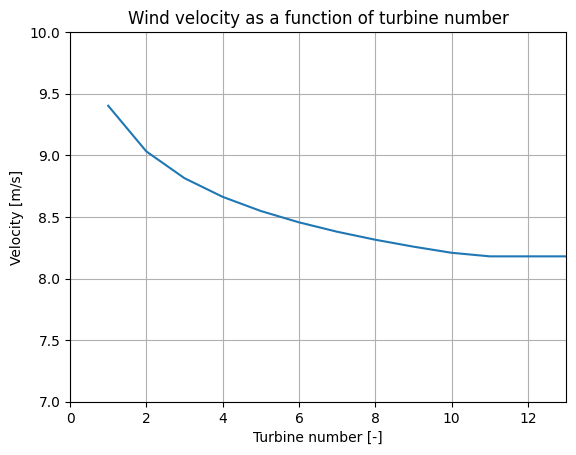

In [29]:
# Plot power as a function of turbine number
plt.plot(x_power/(s*D_local), U_hT_local)
plt.xlabel('Turbine number [-]')
plt.ylabel('Velocity [m/s]')
plt.title('Wind velocity as a function of turbine number')
plt.xlim(0, 13)
plt.ylim(7, 10)
plt.grid(True)
plt.show()

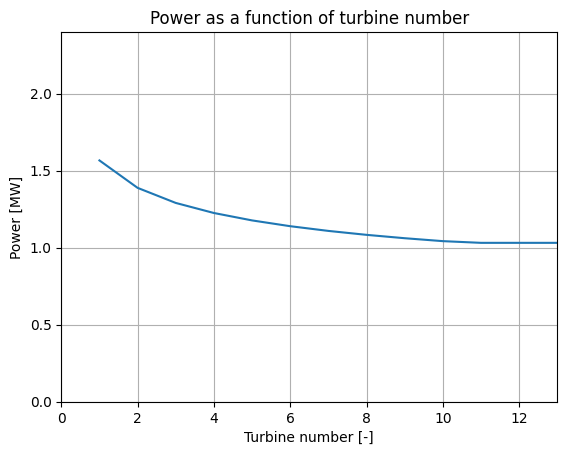

In [30]:
# Plot power as a function of turbine number
plt.plot(x_power/(s*D_local), P_local_offshore)
plt.xlabel('Turbine number [-]')
plt.ylabel('Power [MW]')
plt.title('Power as a function of turbine number')
plt.xlim(0, 13)
plt.ylim(0, 2.4)
plt.grid(True)
plt.show()